In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax
from keras.api._v2.keras import activations
from tensorflow.keras.models import Model
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [3]:
import sys
print(sys.executable)


/usr/bin/python3


In [4]:
train_walk_run_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [5]:
train_walk_run = ImageDataGenerator()

train_data = train_walk_run.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/walk_or_run_train/train',
    target_size=(224, 224),
    batch_size=15,
    class_mode='categorical'
)



Found 600 images belonging to 2 classes.


In [6]:
test_data = train_walk_run.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/walk_or_run_test/test',
    target_size=(224, 224),
    batch_size=15,
    class_mode='categorical'
)


Found 141 images belonging to 2 classes.


In [7]:
!unzip '/content/drive/MyDrive/dataset 2/walk_or_run_train.zip'

Archive:  /content/drive/MyDrive/dataset 2/walk_or_run_train.zip
   creating: walk_or_run_train/train/
   creating: walk_or_run_train/train/run/
  inflating: walk_or_run_train/train/run/run_00061c18.png  
  inflating: walk_or_run_train/train/run/run_01d134fc.png  
  inflating: walk_or_run_train/train/run/run_021a5686.png  
  inflating: walk_or_run_train/train/run/run_033697b0.png  
  inflating: walk_or_run_train/train/run/run_04b620cc.png  
  inflating: walk_or_run_train/train/run/run_0648da3d.png  
  inflating: walk_or_run_train/train/run/run_07df7b55.png  
  inflating: walk_or_run_train/train/run/run_0a9284fb.png  
  inflating: walk_or_run_train/train/run/run_0aa1d404.png  
  inflating: walk_or_run_train/train/run/run_0abc30f8.png  
  inflating: walk_or_run_train/train/run/run_0b56f527.png  
  inflating: walk_or_run_train/train/run/run_0b9180f4.png  
  inflating: walk_or_run_train/train/run/run_0c3ec7f1.png  
  inflating: walk_or_run_train/train/run/run_0c537846.png  
  inflating: wa

In [8]:
!unzip '/content/drive/MyDrive/dataset 2/walk_or_run_test.zip'

Archive:  /content/drive/MyDrive/dataset 2/walk_or_run_test.zip
   creating: walk_or_run_test/test/
   creating: walk_or_run_test/test/run/
  inflating: walk_or_run_test/test/run/run_0794de59.png  
  inflating: walk_or_run_test/test/run/run_0987572f.png  
  inflating: walk_or_run_test/test/run/run_0b30ced7.png  
  inflating: walk_or_run_test/test/run/run_0c98676d.png  
  inflating: walk_or_run_test/test/run/run_1073489f.png  
  inflating: walk_or_run_test/test/run/run_13662896.png  
  inflating: walk_or_run_test/test/run/run_1bb05084.png  
  inflating: walk_or_run_test/test/run/run_1ff02911.png  
  inflating: walk_or_run_test/test/run/run_20dcdbec.png  
  inflating: walk_or_run_test/test/run/run_26e292d1.png  
  inflating: walk_or_run_test/test/run/run_274eaee3.png  
  inflating: walk_or_run_test/test/run/run_2aab0e1b.png  
  inflating: walk_or_run_test/test/run/run_2b758aeb.png  
  inflating: walk_or_run_test/test/run/run_2bae0a9d.png  
  inflating: walk_or_run_test/test/run/run_2fe54

In [9]:
TRAIN_PATH = '/content/drive/MyDrive/archive (1)/walk_or_run_train/train'
TEST_PATH = '/content/drive/MyDrive/archive (1)/walk_or_run_test/test'


In [10]:
BATCH_SIZE = 128
COLOR_MODE = 'rgb'
TARGET_SIZE = (224, 224)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 10
CLASSES = ['Run','Walk']

In [11]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, rotation_range=30,
                                                    rescale=1/255,validation_split=0.1,
                                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [12]:
train_data = idg.flow_from_directory(directory=TRAIN_PATH,
                                                    target_size=TARGET_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode=COLOR_MODE,
                                                    subset='training')

validation_data =idg.flow_from_directory(directory=TRAIN_PATH,
                                                    target_size=TARGET_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode=COLOR_MODE,
                                                    subset='validation')

test_data = idg.flow_from_directory(directory=TEST_PATH,
                                                   target_size=TARGET_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   color_mode=COLOR_MODE)

Found 541 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


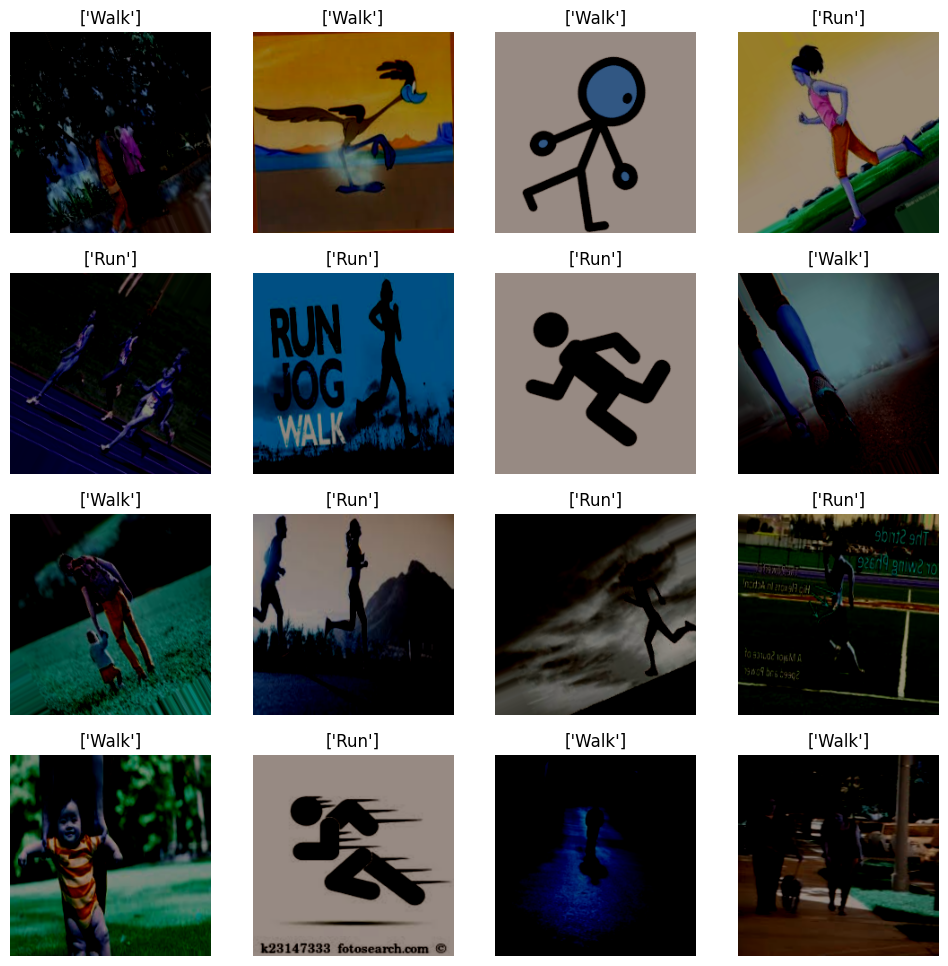

In [13]:
import matplotlib.pyplot as plt
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for img, l, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    l = l.astype(int)
    ax.set_title(classes[l == 1])

plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model

In [15]:
def my_model():
    #Load vgg16 model without classifier layers
    vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SIZE)

    #Freeze the convolutional base|
    vgg16_model.trainable = False

    #Add new classifier layers
    flatten = Flatten()(vgg16_model.layers[-1].output)
    fc1 = Dense(units=4096, activation='relu')(flatten)
    dropout = Dropout(0.2)(fc1)
    fc2 = Dense(units=1024,activation='relu')(dropout)
    output = Dense(2, activation='softmax')(fc2)

    #Define a new modol
    model = Model(inputs = vgg16_model.input, outputs=output)

    #Model summary
    model.summary()

    return model

In [16]:
model = my_model()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [17]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer='Adam', loss=loss, metrics=['accuracy'])

In [18]:
def run_or_walk(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224,3))
    plt.imshow(img)
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model.h5')
    output = model.predict(img)
    print(classes[output[0]==1])

In [19]:
#import libraries
import os
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5',
                                                    monitor='accuracy', verbose=1,
                                                    save_best_only=True,
                                                    save_weights_only=False,
                                                    mode='auto',
                                                    save_freq='epoch')

earlystoping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                    min_delta=0,
                                                    patience=5,  #Number of epochs with no improvement after which training will be stopped.
                                                    verbose=1,
                                                    mode='auto')

log_dir = './logs/fit/' + datetime.datetime.now().strftime('%m.%d.%Y--%H-%M-%S')
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                 histogram_freq=1,
                                                 write_graph=True,
                                                 write_images=False,
                                                 update_freq='epoch')


In [ ]:
# -- Train model --
history = model.fit(x=train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data),
                        verbose=1,
                        validation_data=validation_data,
                        validation_steps=1,
                        callbacks=[checkpoint, earlystoping, tensorboard])

# -- Save model --
model.save('my_model.h5')

In [ ]:
run_or_walk('../input/walk-or-run/walk_or_run_test/test/walk/walk_0c96b662.png')